# Modeling Bacteria, Antibiotics and Immune System
This notebook is to accompany the Report file Computation and Code section. Figures and Simulations are generated here.


## Parameter Selection

Our Invarient Set $\mathcal{A}$ implied some restriction on parameters which alligned with our biological and mathematical intuition. 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

## Symbolic Calculation

Here is a Calculation of Jacoubian of the system without numerical computation. Using Python Symbolic library.

In [13]:
import sympy as sp

a, s, r, p = sp.symbols('a s r p')
mu, eta_r, eta_s, alpha, beta, gamma = sp.symbols('mu eta_r eta_s alpha beta gamma')

vars_params = [a, s, r, p , alpha, beta, gamma, eta_s, eta_r, mu]

def f(x):
    return x - x**2 + 3/4
    
n = s + r

f1 = mu * (1 - a)
f2 = eta_s*(1 - n)*s - alpha * a * s - (beta * s * r )/n - gamma * s * p
f3 = eta_r*(1 - n)*r + (beta * s * r )/n - gamma * r * p
f4 = p * ( f(n) - p )

dyn = sp.Matrix([f1,f2,f3,f4])

J = dyn.jacobian([a,s,r,p])

In [14]:
## for E1
li = [1 , 0, 0 , f(0) , 1,0.1, 1,1,0.3,3]

dic = dict(zip(vars_params, li))

res = J.subs(dic).evalf()
res

Matrix([
[-3.0,     0,     0,     0],
[   0, -0.75,  -0.1,     0],
[   0,     0, -0.35,     0],
[   0,  0.75,  0.75, -0.75]])

## Numerical Solver

Our solver is in `odeint` function of `scipy.integrate` module, which actualy is a wrapper for LSODE in ODEPACK in Fortran.

In [ ]:
from scipy.integrate import odeint

def evaluate_dyn(y , t, alpha, beta, gamma, eta_s, eta_r, mu) -> tuple:
    a, s, r, p = y
    state_vars = [a, s, r, p , alpha, beta, gamma, eta_s, eta_r, mu]
    dic = dict(zip(vars_params, state_vars))
    res = dyn.subs(dic).evalf()
    res = sp.matrix2numpy(res, dtype=np.float64)
    return res.flatten()



In [ ]:
def plot_solutions(sol, t, title:str, save=False) -> None:
    
    fig, ax = plt.subplots(figsize=(10, 6))

    variable_names = ['Antibiotic (a)', 'NARB (s)', 'ARB (r)', 'Immune System (p)']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Professional color scheme

    for i in range(4):
        ax.plot(t, sol[:, i], 
                color=colors[i], 
                linewidth=2,
                label=variable_names[i])

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('System Variables', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='best')

    if save:
        fig.savefig("figs/{title}.png")

    plt.tight_layout()
    plt.show()

### For $E_1(1,0,0,f(0))$

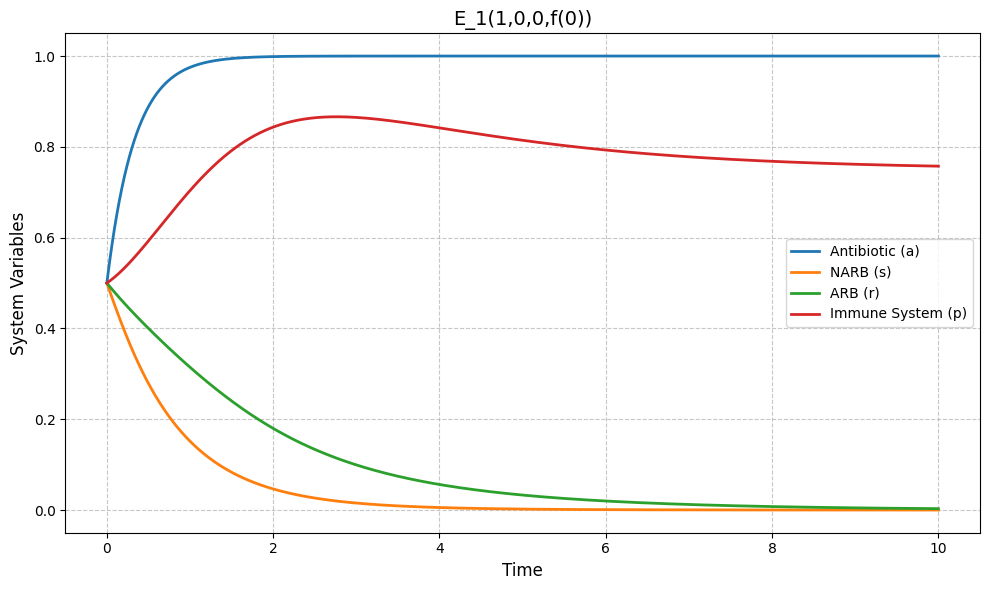

In [ ]:
parset =  (1, 0.1, 1, 1, 0.3, 3)

if parset[vars_params.index(alpha) - 4] > parset[vars_params.index(eta_s) - 4]:
    print("E1")


y0 = np.repeat(0.5, 4)

t = np.linspace(0, 10, 1000)

sol = odeint(evaluate_dyn, y0 , t, args=parset)

plot_solutions(sol, t, r"Trajectory path for $E_1(1,0,0,f(0))$")

In [28]:
vars_params

[a, s, r, p, alpha, beta, gamma, eta_s, eta_r, mu]

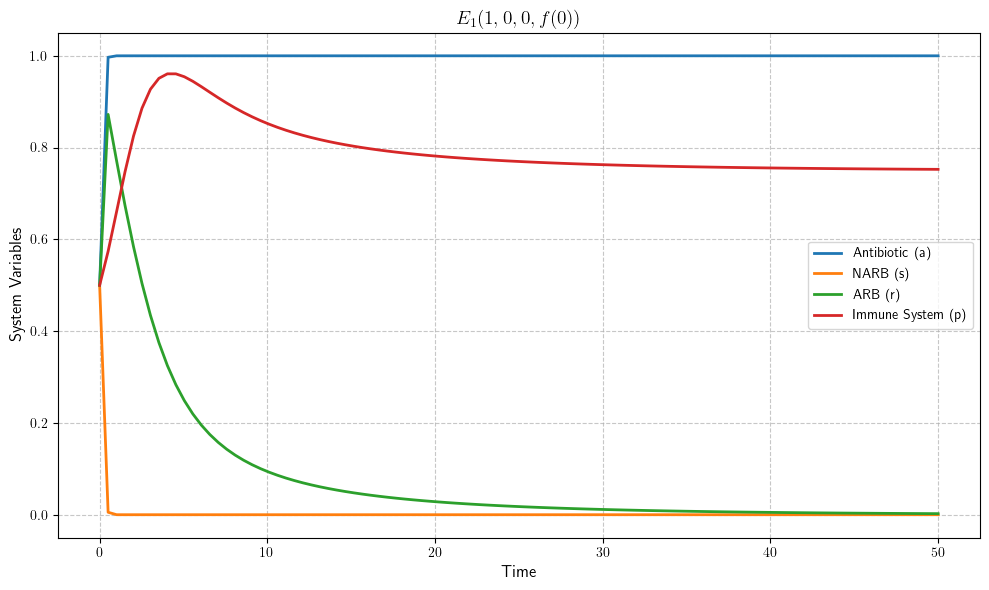

In [ ]:
parset =  np.random.randint(0, 10)

if parset[vars_params.index(alpha) - 4] > parset[vars_params.index(eta_s) - 4]:
    print("E1")


y0 = np.repeat(0.5, 4)

t = np.linspace(0, 50, 100)

sol = odeint(evaluate_dyn, y0 , t, args=parset)

plot_solutions(sol, t, r"Trajectory path for $E_1(1,0,0,f(0))$")